In [1]:
import os, glob, cv2
import dicom as di
import numpy as np
from matplotlib import pyplot as plt

In [2]:
par_dir = './data/'
tmp = os.listdir(par_dir)
cha_dir = []
for i in tmp:

    if os.path.isdir(par_dir+i) == True and 'ipynb' not in i:
        cha_dir.append(i)
        
cha_dir.sort()

In [8]:
path_list = {}
for cha in cha_dir:
    pat_dir = os.listdir(par_dir+cha)
    pat_dir.sort()
    for pat in pat_dir:
        if pat in ['12692', '11961']: continue
        path_list[pat]=[]
    
        dicom_path = glob.glob(par_dir+cha+'/'+pat+'/*.dcm')
        dicom_path.sort()
        if 'RTST' in dicom_path[-1]:
            dicom_path.pop()
        cnt = 0
        for dicom in dicom_path:
            dcm = di.read_file(dicom)
            if 'MPR' not in dcm.SeriesDescription.upper(): continue
            elif 'HOSPITAL' in dcm.SeriesDescription.upper() : continue
            elif dcm.SliceThickness != 1 : continue
            else:
                path_list[pat].append(dicom)

In [11]:
len(path_list.keys())

20

In [4]:
for cha in cha_dir:
    pat_dir = os.listdir(par_dir+cha)
    pat_dir.sort()
    for pat in pat_dir:
        
    
        dicom_path = glob.glob(par_dir+cha+'/'+pat+'/*.dcm')
        dicom_path.sort()
        if 'RTST' in dicom_path[-1]:
            dicom_path.pop()
        cnt = 0
        for dicom in dicom_path:
            dcm = di.read_file(dicom)
            if 'MPR' not in dcm.SeriesDescription.upper(): continue
            elif 'HOSPITAL' in dcm.SeriesDescription.upper() : continue
            elif dcm.SliceThickness != 1 : continue
            else:
                dicom_t1 = dicom
                dcm_t1 = di.read_file(dicom)
                cnt += 1
        print(par_dir+cha+'/'+pat)
        print(dcm_t1.SeriesDescription)
        print(dicom_t1)
        print('Thickness : ', dcm_t1.SliceThickness)
        print('T1 : ', cnt)
        print('----------------------------')

./data/01/12575
HEAD^BRAIN; <MPR Range>; T1_MPRAGE_sag_fs; HEAD
./data/01/12575/MR000171.dcm
Thickness :  1
T1 :  171
----------------------------
./data/01/12653
HEAD^BRAIN; <MPR Range>; t1_mprage_sag_fs_iso_1; HEAD
./data/01/12653/MR000170.dcm
Thickness :  1
T1 :  170
----------------------------
./data/01/12692
HEAD^BRAIN; <MPR Range>; t1_mprage_sag_fs_iso_1; HEAD
./data/01/12653/MR000170.dcm
Thickness :  1
T1 :  0
----------------------------
./data/01/12803
HEAD^RT PLANE(LIMIT); T1_MPRGE_tra; T1_MPRGE_tra; HEAD
./data/01/12803/MR000160.dcm
Thickness :  1
T1 :  160
----------------------------
./data/01/12841
HEAD^BRAIN; <MPR Range>; t1_mpr_sag_fs; HEAD
./data/01/12841/MR000156.dcm
Thickness :  1
T1 :  156
----------------------------
./data/02/11439
HEAD^BRAIN; <MPR Range>; t1_mprage_sag_fs_iso_1; HEAD
./data/02/11439/MR000186.dcm
Thickness :  1
T1 :  186
----------------------------
./data/02/11900
HEAD^RT PLAN(LIMIT); t1_mprage_tra; t1_mprage_tra; HEAD
./data/02/11900/MR000259.d

In [9]:
imgs = {}
for cha in cha_dir:
    pat_dir = os.listdir(par_dir+cha)
    pat_dir.sort()
    for pat in pat_dir:
        tmp_img = None    
    
        dicom_path = glob.glob(par_dir+cha+'/'+pat+'/*.dcm')
        dicom_path.sort()
        if 'RTST' in dicom_path[-1]:
            dicom_path.pop()
        cnt = 0
        for idx, dicom in enumerate(dicom_path):
            dcm = di.read_file(dicom)
            if 'MPR' not in dcm.SeriesDescription.upper(): continue
            elif 'HOSPITAL' in dcm.SeriesDescription.upper() : continue
            elif dcm.SliceThickness != 1 : continue
            else:
                dicom_t1 = dicom
                dcm_t1 = di.read_file(dicom)
                img = dcm_t1.pixel_array
                img = cv2.resize(img, (256,256))
                img = np.reshape(img, [1,256,256])
                if 'None' in str(type(tmp_img)):
                    tmp_img = img
                else :
                    tmp_img = np.concatenate((tmp_img, img), axis=0)
        
        if 'None' in str(type(tmp_img)):
            continue
        else:
            print('%s/%s'%(cha, pat))
            print(len(tmp_img), '\n')
            imgs[pat] = tmp_img

01/12575
171 

01/12653
170 

01/12803
160 

01/12841
156 

02/11439
186 

02/11900
176 

02/11906
151 

02/12127
157 

02/12280
140 

02/12422
157 

02/12459
164 

02/5569
153 

03/11498
180 

03/11534
176 

03/11760
184 

03/12259
178 

03/12735
155 

03/6002
142 

03/6702
160 

03/7360
158 



# description 이 너무 다름
- 동일한 description 필요

In [15]:
dcm = di.read_file('./data/02/11961/MR000192.dcm')
print(dcm.SeriesDescription)
print(dcm.SliceThickness)

HEAD^BRAIN; <MPR Range>; t1_mprage_sag_fs_new; HEAD
0.60000002384186


# Slice Thickness
- 01/12692 : 0.9960938
- 02/11961 : 0.60000002384186
- 나머지 모두 1

12735
6763403


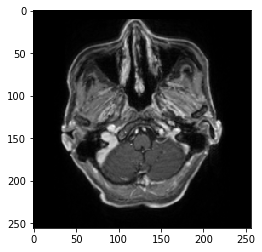

11534
11010527


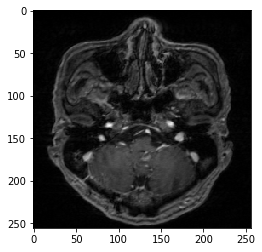

11439
5568962


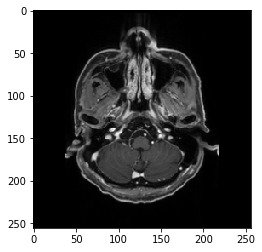

12259
11631801


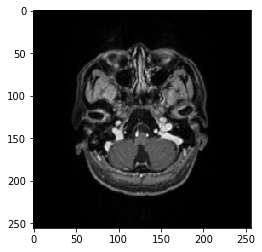

6702
9518578


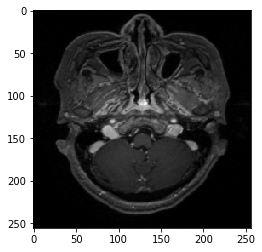

12422
14694919


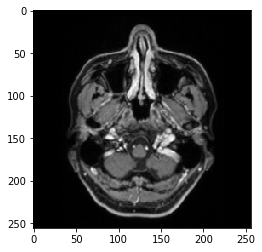

11900
3940218


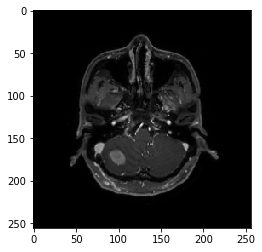

12127
5943435


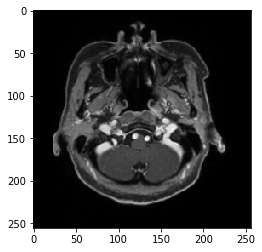

7360
4829483


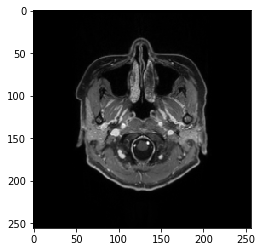

12280
4305262


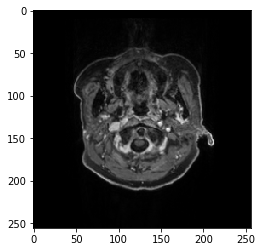

11498
6353990


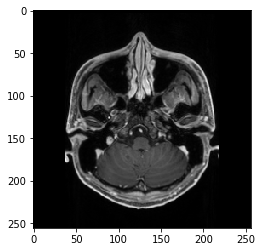

12459
11484417


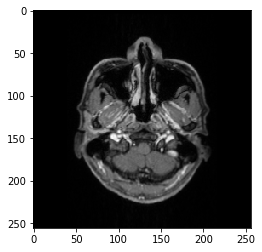

11760
5916681


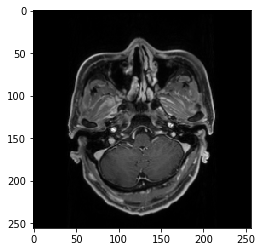

12841
10333814


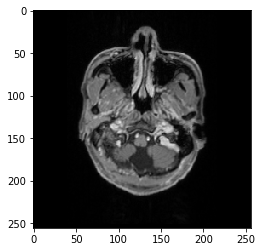

6002
5258421


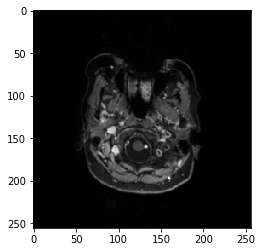

12803
8024279


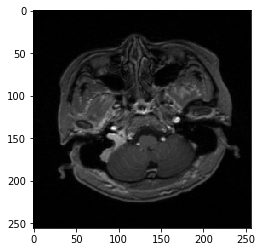

5569
2089956


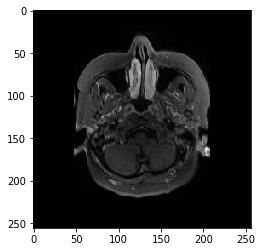

11906
16924505


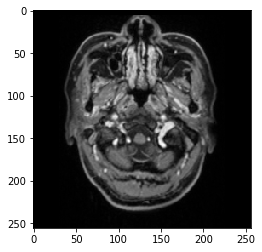

12575
10722828


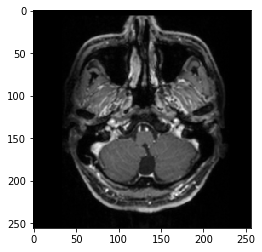

12653
8051469


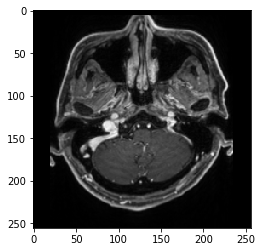

In [13]:
for key in imgs.keys():
    print(key)
    num=-140
    print(np.sum(imgs[key][num]))
    plt.imshow(imgs[key][num], cmap='gray')
    plt.show()